In [1]:
from LorenzEDMD.EDMD.EDMD import EDMD_CHEB
from matplotlib import pyplot as plt
import numpy as np
import pickle
from LorenzEDMD.utils.data_processing import get_spectral_properties
from LorenzEDMD.dynamical_system.Lorenz import lorenz63
from LorenzEDMD.EDMD.EDMD import Tikhonov, TSVD

In [2]:
# with open("edmd_objects.pkl", "rb") as f:
#     EDMDS = pickle.load(f)

# lorenz = lorenz63()
# degrees = [x[0].degree for x in EDMDS]
# flight_times = [x.flight_time for x in EDMDS[0]]

In [3]:
with open("./data/response_cluster.pkl","rb") as f:
    RESPONSE = pickle.load(f)

In [4]:
response_settings : lorenz63 = RESPONSE["Response Settings"]
tmin , tmax = response_settings.t_span
Dt = response_settings.dt * response_settings.tau
t = np.arange(tmin,tmax,Dt)

In [5]:
Linear = []
Quadratic = []

for rp , rm , eps in zip(RESPONSE["Positive Response"],RESPONSE["Negative Response"], RESPONSE["Amplitudes"]):
    Linear.append(  (rp - rm) / (2*eps) )
    Quadratic.append(  (rp + rm) / (2*eps) )

       

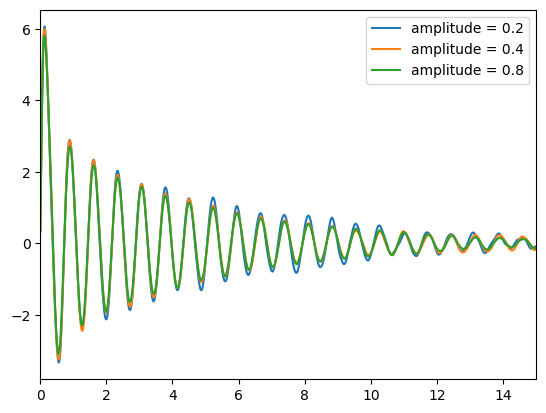

In [6]:
fig, ax = plt.subplots()
for x, eps in zip( Linear , RESPONSE["Amplitudes"]):
    ax.plot(t,x[:,2],label=f"amplitude = {eps}")

ax.set_xlim(0, 15)
ax.legend()

In [7]:
Gz = np.array( [x[:,2] for x in Linear] ).mean(axis=0)

(-1.0, 12.0)

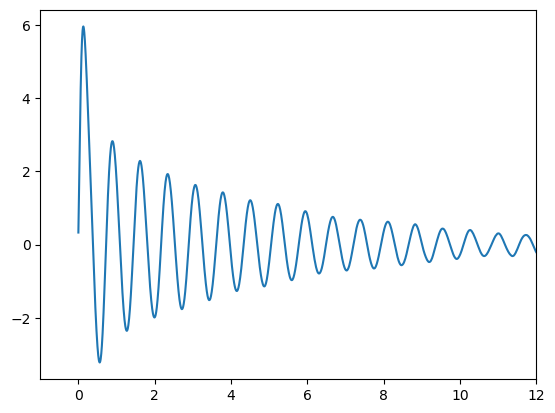

In [8]:
fig, ax = plt.subplots()
ax.plot(t,Gz)
plt.xlim(-1,12)

In [10]:
to_save = {
"t" : t,
"Green Function": Gz
}
with open("./data/GREEN_FUNCTION.pkl", "wb") as f:
    pickle.dump(to_save, f)
